In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the train data
train_data = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1)
X_train = train_data[:, 1:]  # Pixel values
y_train = train_data[:, 0].astype(int)  # Labels

# Load the test data
test_data = np.loadtxt('mnist_test.csv', delimiter=',', skiprows=1)
X_test = test_data[:, 1:]  # Pixel values
y_test = test_data[:, 0].astype(int)  # Labels

# Train a KNN classifier on the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)





Accuracy: 0.9688


In [2]:
# Make predictions on the correct test set
predictions = knn.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy for each digit
digit_accuracy = cm.diagonal() / cm.sum(axis=1)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Overall Accuracy: {accuracy:.4f}\n")

for digit in range(10):
    print(f"Accuracy for digit {digit}: {digit_accuracy[digit]:.4f}")

Overall Accuracy: 0.9688

Accuracy for digit 0: 0.9939
Accuracy for digit 1: 0.9982
Accuracy for digit 2: 0.9603
Accuracy for digit 3: 0.9663
Accuracy for digit 4: 0.9613
Accuracy for digit 5: 0.9664
Accuracy for digit 6: 0.9864
Accuracy for digit 7: 0.9611
Accuracy for digit 8: 0.9374
Accuracy for digit 9: 0.9534


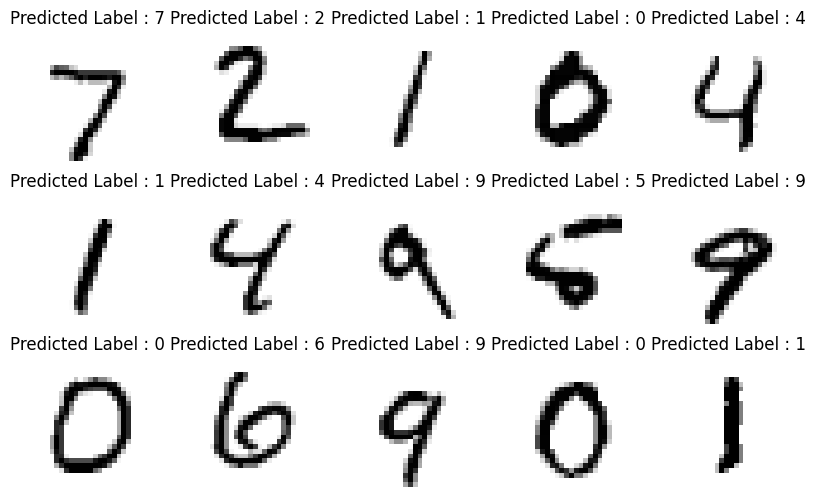

In [3]:
# Plot some example images and their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = f"Predicted Label : {y_pred[i]}")
    ax.axis('off')
plt.show()
